In [2]:
import warnings
warnings.filterwarnings('ignore')

بر روی دیتاست ماه چیست و با چه روش هایی حل میشود projection مشکل

In [ ]:
چون داده ها در دو بعد یا نهایتا سه بعد قابل تصویر سازی هستند در این روش ممکن است اطلاعات زیادی از بین بروند
از روش های کاهش ابعاد میتوانیم استفاده کنیم
pca  , llA , t-sne 

داده هایی که کورولیشن بالای خطی دارند روی داده های گل زنبق را با الگوریتم زیر حذف کنید

FactorAnalysis (mean)


In [3]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
df= pd.read_csv('iris.csv')
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [7]:
df=df.drop(columns=['Id'])

In [8]:
df['Species'].replace("Iris-setosa",0,inplace= True)
df['Species'].replace("Iris-virginica",1,inplace = True)
df['Species'].replace("Iris-versicolor",2,inplace=True)

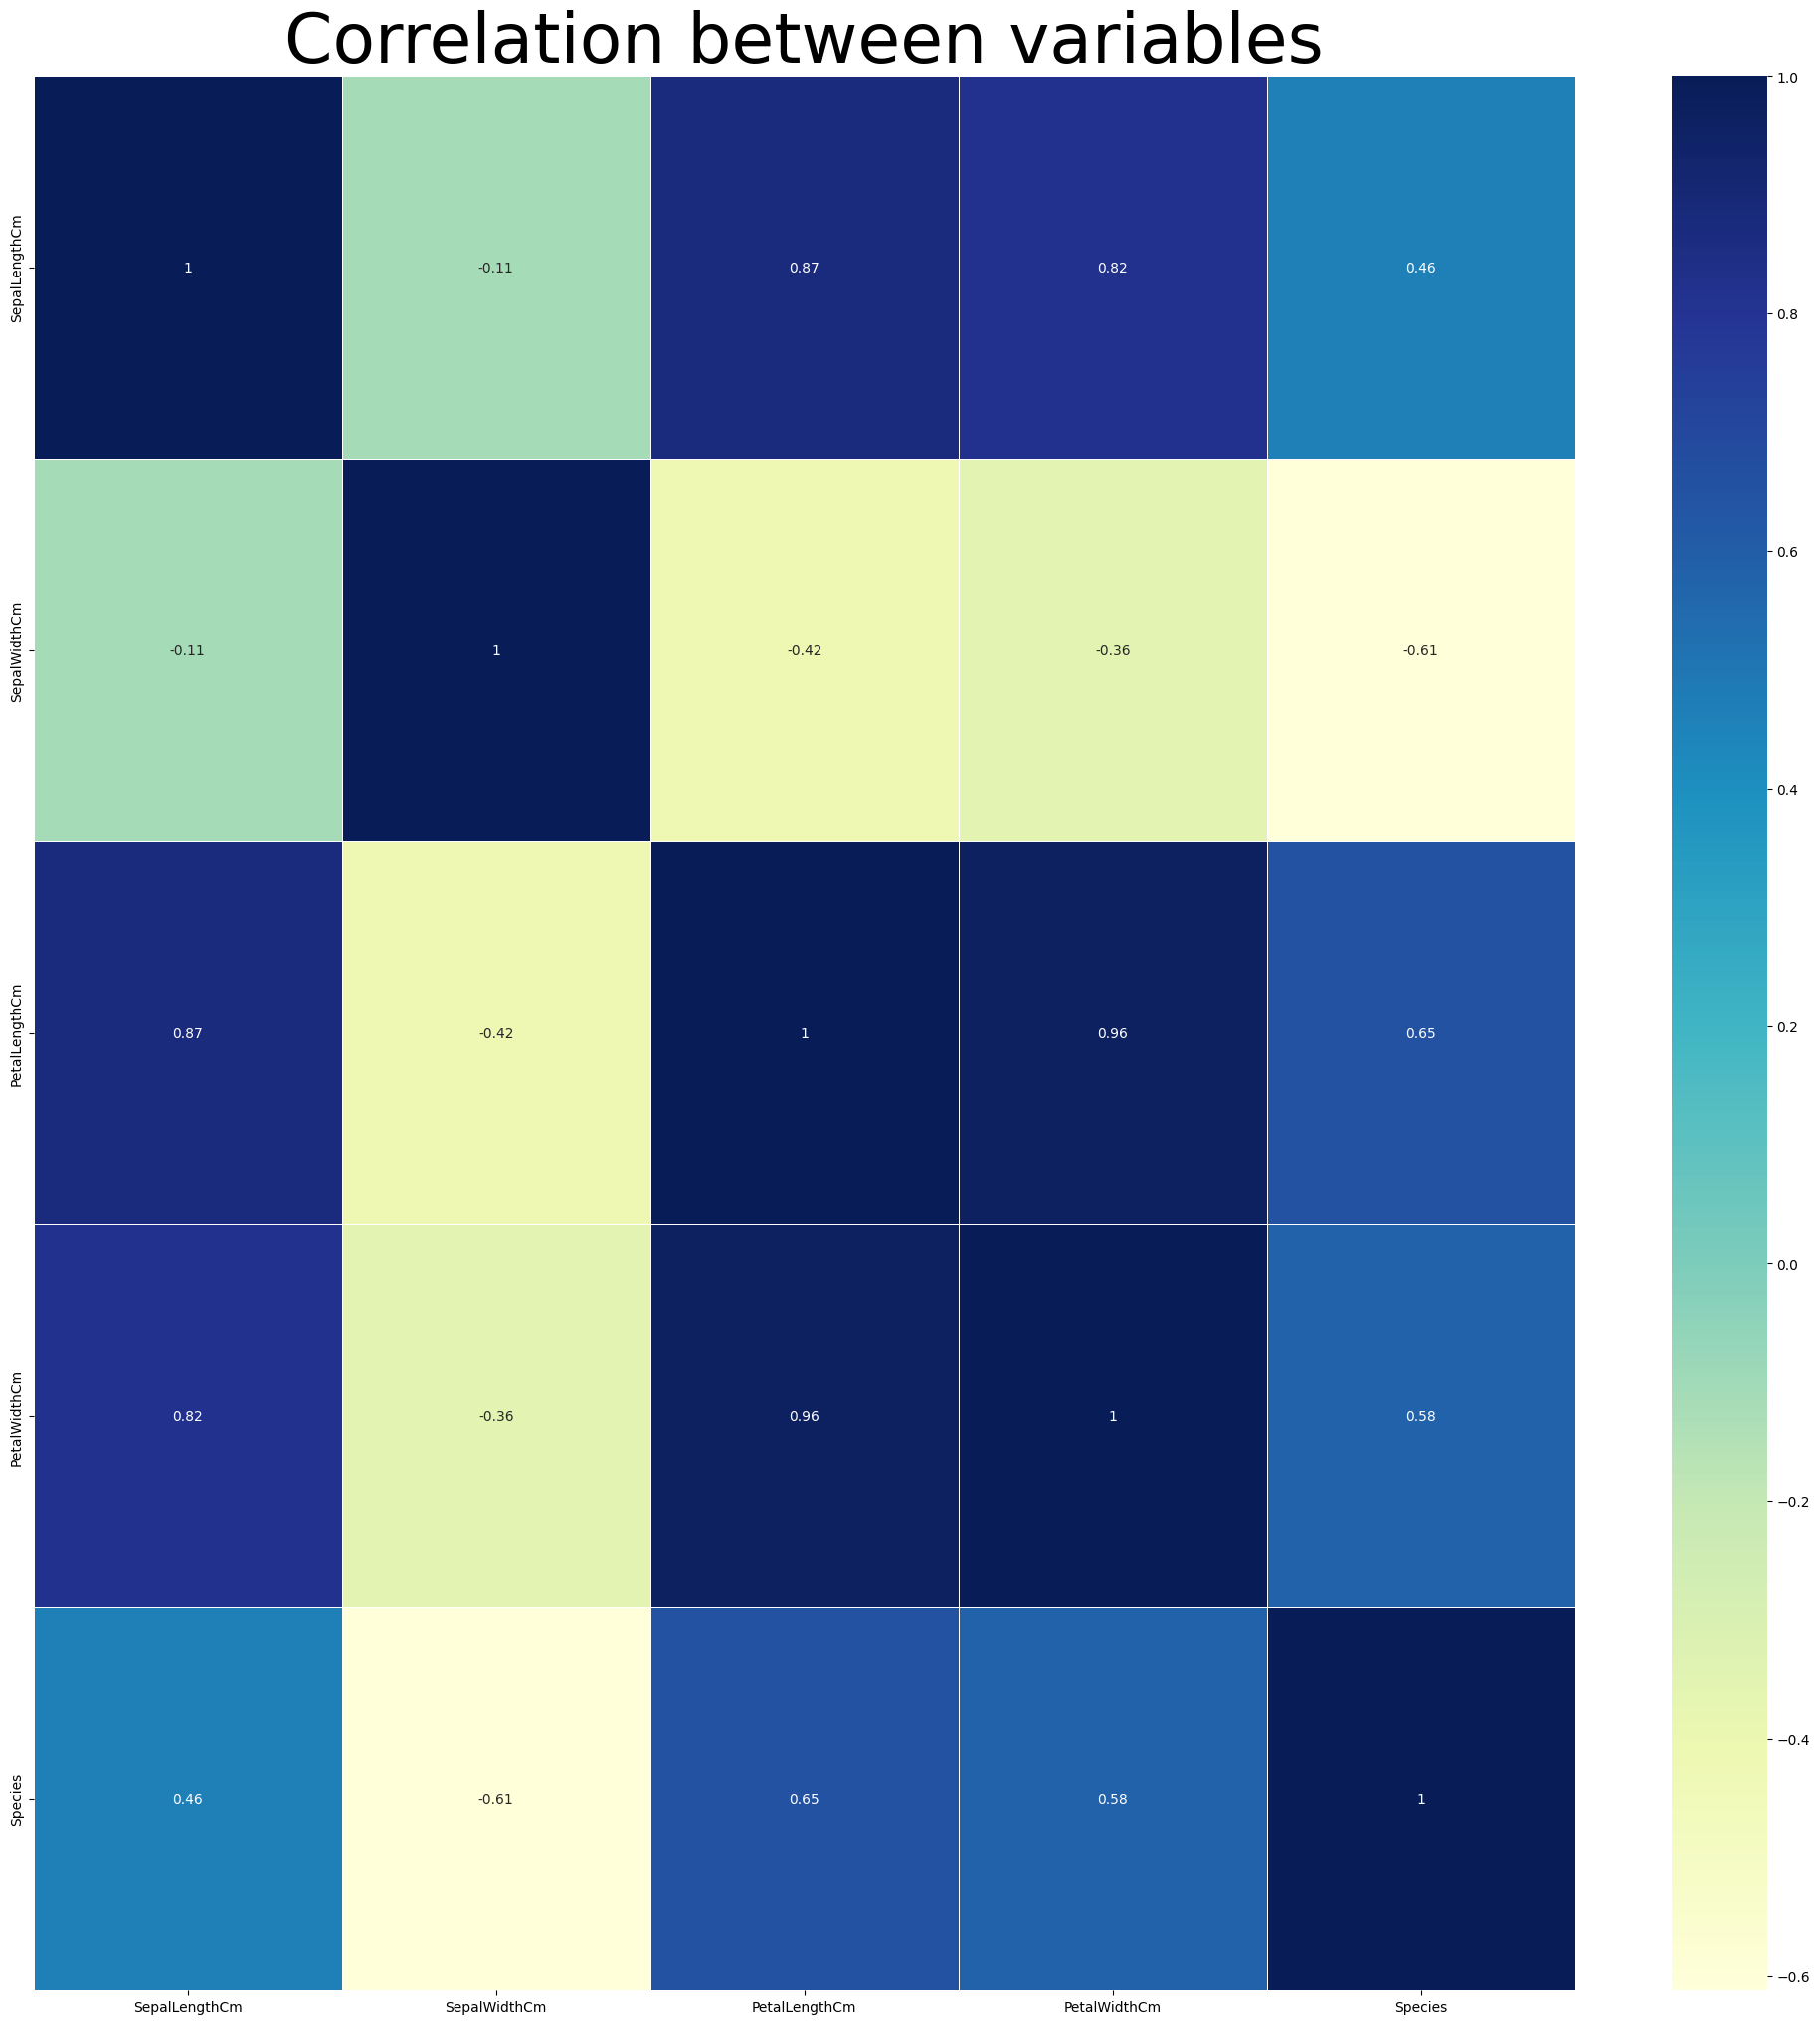

In [29]:
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(df.corr(), annot=True, ax=ax, cmap="YlGnBu", linewidths = .5); ax.set_title("Correlation between variables", fontsize = 50)
plt.show()

In [9]:
X = df.drop('Species',axis=1)
Y = df['Species']

In [12]:
fa = FactorAnalyzer(3, rotation='varimax')
fa_trm = fa.fit_transform(X)
loads = fa.loadings_
print(loads)


[[ 0.99615483 -0.00219164  0.03110873]
 [-0.10569286  0.7556987  -0.07801293]
 [ 0.86531449 -0.40597974  0.28533037]
 [ 0.80499382 -0.30818192  0.49440093]]


In [13]:
fa_trm.shape

(150, 3)

ابعاد را به 1 کاهش دهید lda حال با استفاده از

In [17]:
lda =LinearDiscriminantAnalysis(n_components =1 )
X_lda = lda.fit_transform(X,Y)


In [18]:
X_lda.shape

(150, 1)

ICA

برای داده های که ویژگی های آنها کورولیشن غیر خطی دارند استفاده میشود

isomap

فاصله ها را استفاده کرده و از منیفولد استفاده میکند

روی دیتای ماه آن را تست کنید و تغییرات را با پلات کردن نشان دهید

In [20]:
from sklearn.datasets import make_moons
from sklearn.manifold import Isomap
from sklearn.decomposition import FastICA

In [29]:
x , y= make_moons(n_samples=1000, noise=0.05)

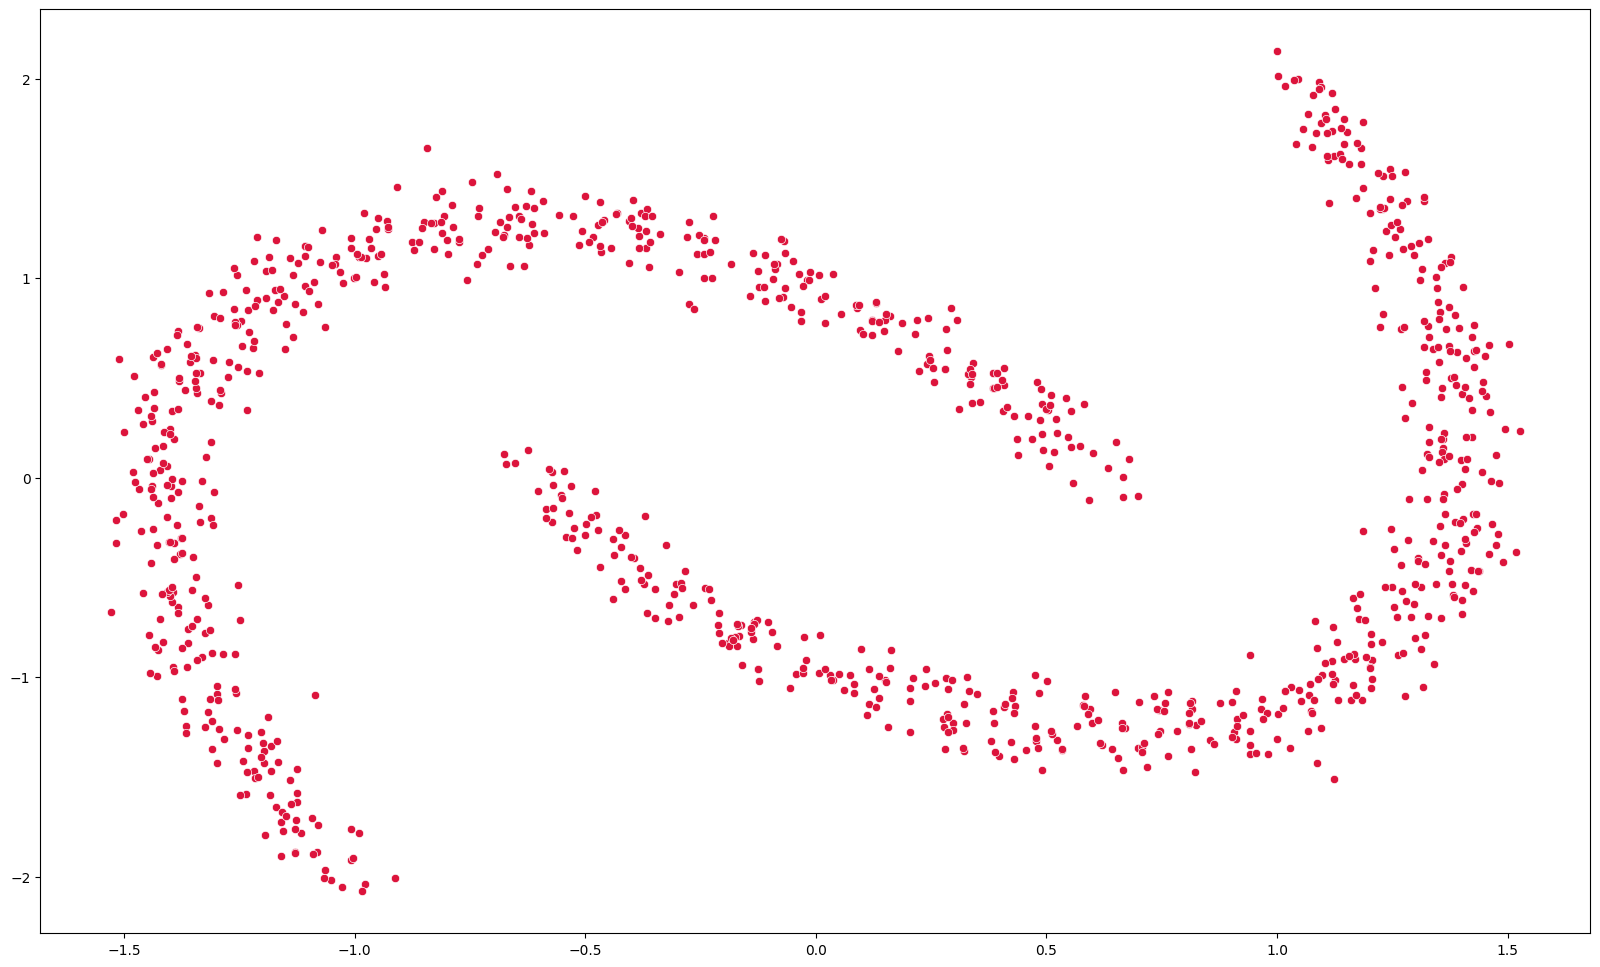

In [28]:
ica = FastICA(n_components=7,
         random_state=0,
         whiten='unit-variance')
ica_x = transformer.fit_transform(x)
plt.figure(figsize=(20,12))
sns.scatterplot(x=ica_x[:,0], y=ica_x[:,1], color="crimson")
plt.show()

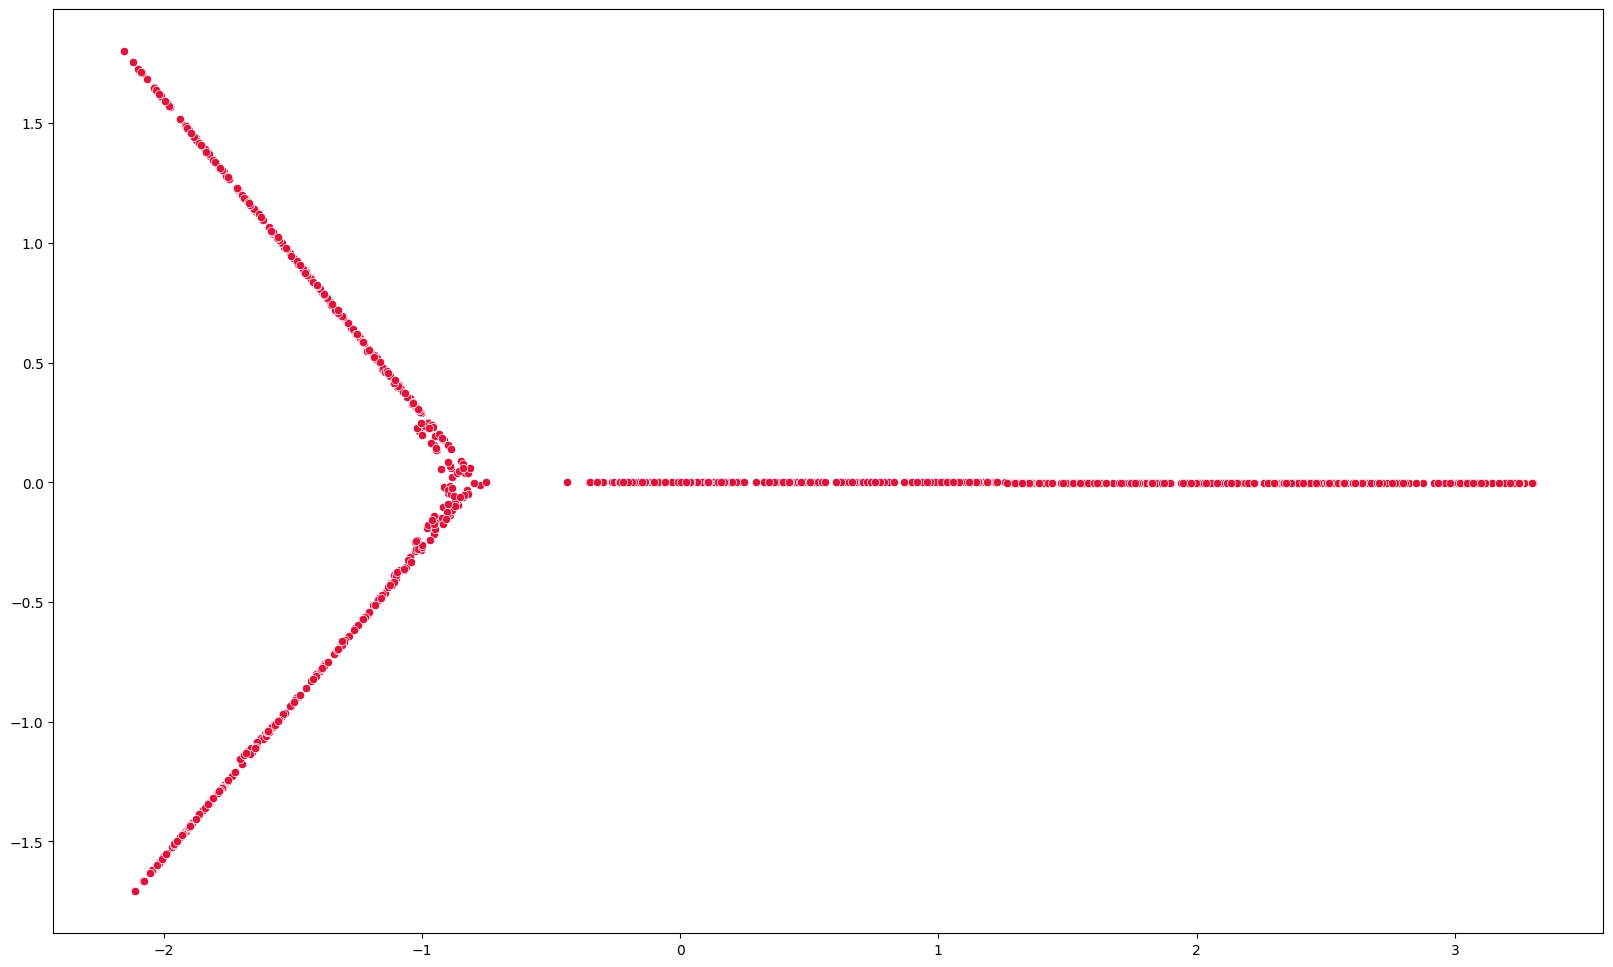

In [24]:
iso = Isomap(n_components=2)
iso_x = iso.fit_transform(x)
plt.figure(figsize=(20,12))
sns.scatterplot(x=iso_x[:,0], y=iso_x[:,1], color="crimson")
plt.show()

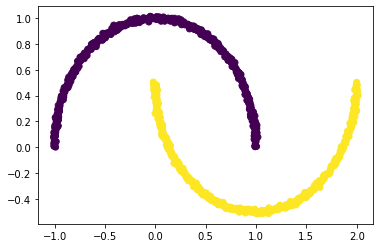

In [16]:
moon data

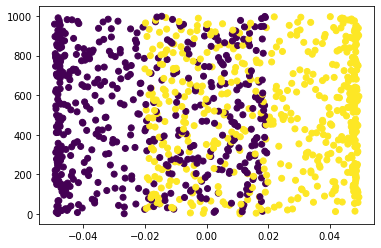

In [21]:
example of exit

tsne

با استفاده از گراف و همسایگی این کار را انجام میدهد و هم نقاط دور را در از هم 

در نظر میگیرد لوکال و گلوبال را در نظر می گیرد

با استفاده از 

umap 

که سرعت پایین الگوریتم قبل را بهبود بخشیده  دیتای ماه را کاهش ابعاد دهید و در انتها با رسم پلات عملکرد ها را مقایسه کنید

(با هر دو الگوریتم این کار را انجام دهید)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.094s...
[t-SNE] Computed neighbors for 1000 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.078385
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.018105
[t-SNE] KL divergence after 1000 iterations: 0.226236


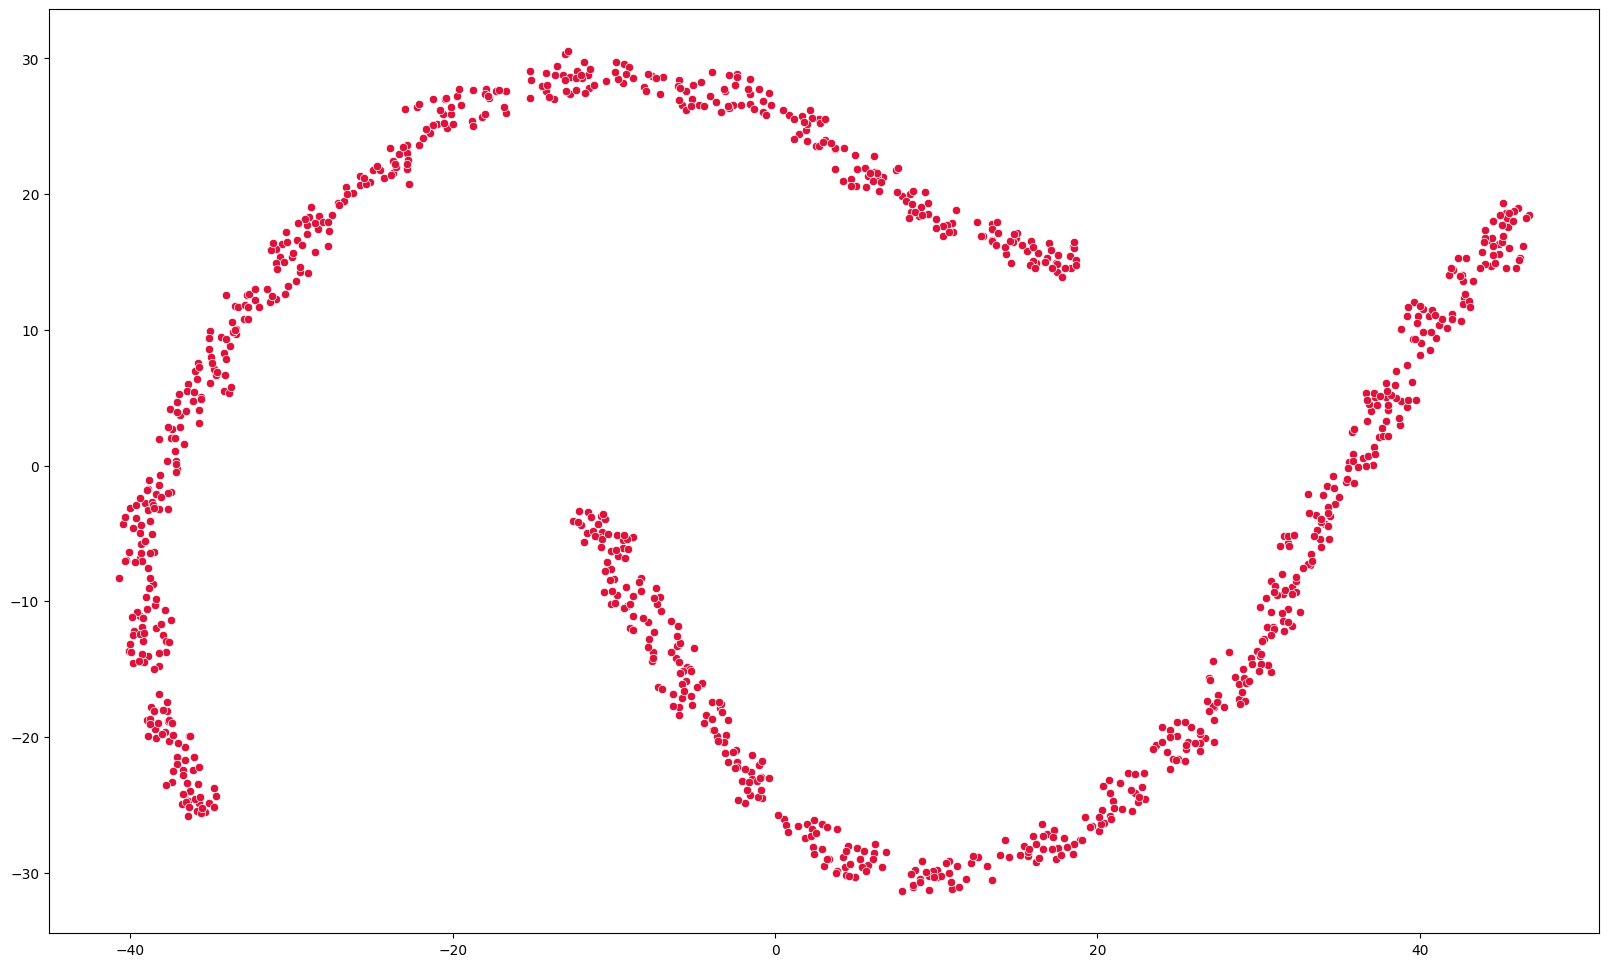

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_x = tsne.fit_transform(x)
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsne_x[:,0], y=tsne_x[:,1], color="crimson")
plt.show()

In [ ]:
#pip install umap-learn

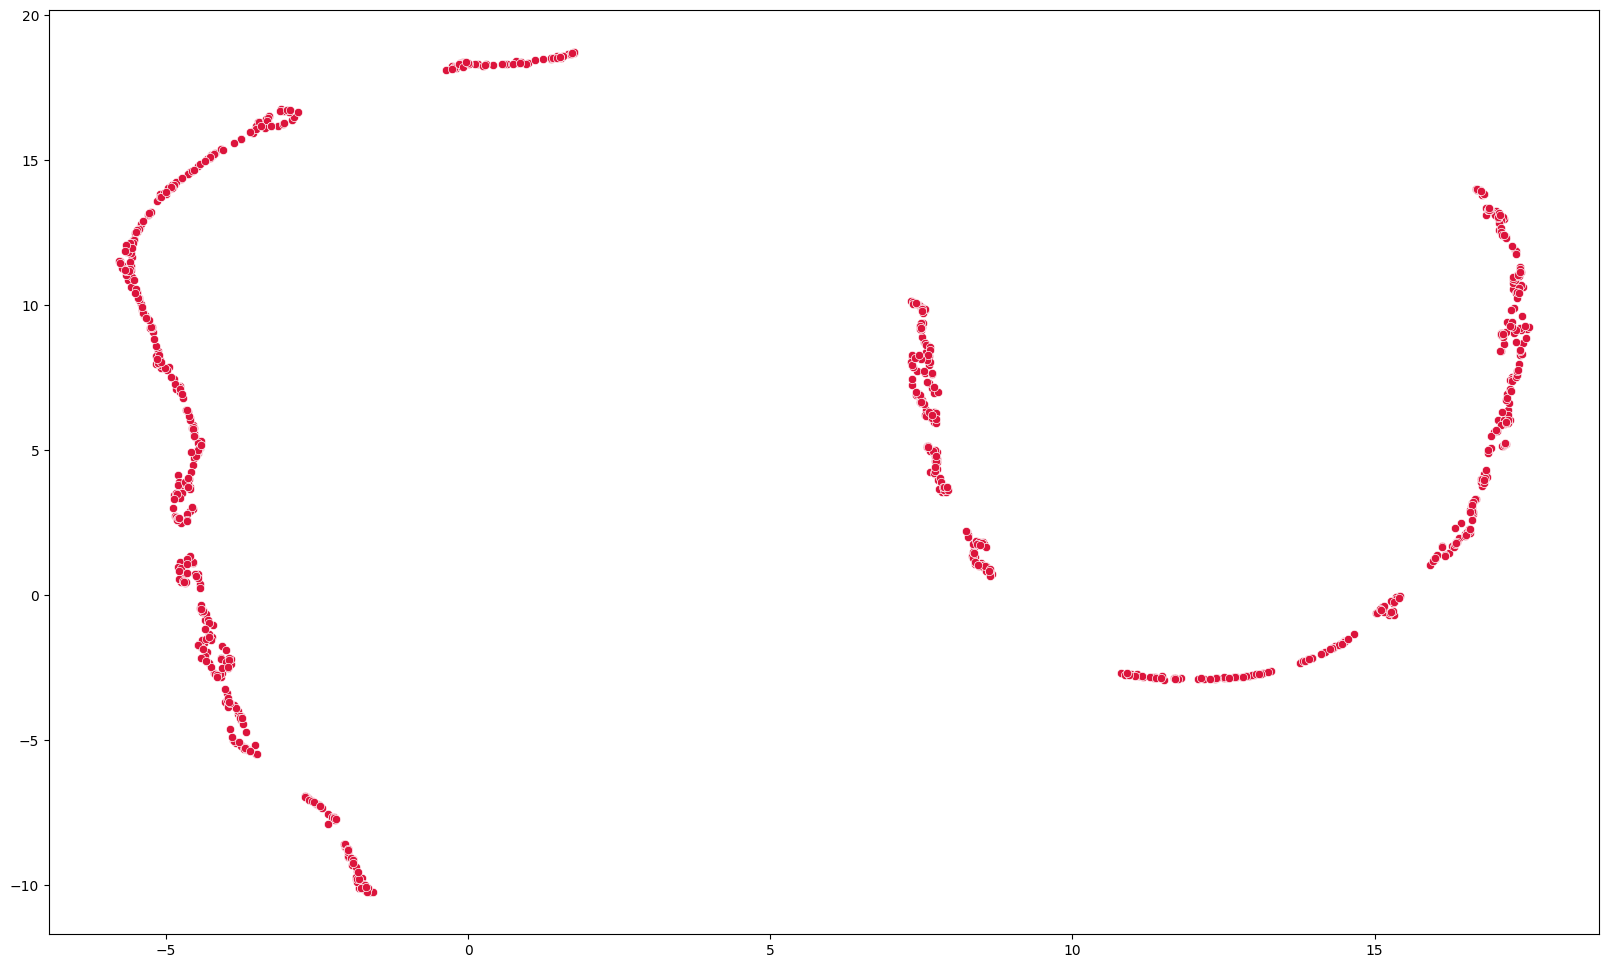

In [34]:
from umap import UMAP
umap = UMAP(random_state=42)
embedding = umap.fit_transform(x)
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], color="crimson")
plt.show()

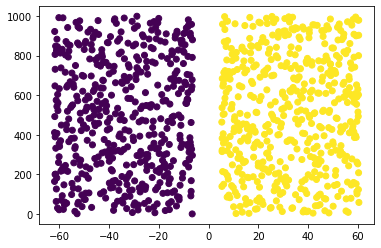

In [27]:
example of exit

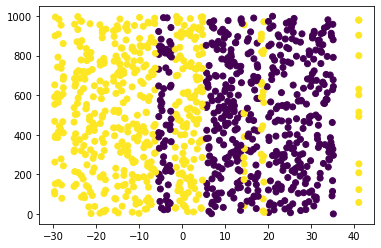

In [29]:
example of exit

یک شبکه عصبی به صورت سریالی با کتابخانه کراس بسازید و آن را در فایلی سیو کنید

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(11,)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 300)               3600      
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 34,710
Trainable params: 34,710
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.layers

In [39]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [43]:
#history = model.fit(X, y,validation_split=0.2 ,epochs=10)

linux

1- در لینوکس برای مخفی سازی از چی استفاده میشود و برای دید فایل های مخفی چه کلیدی در دستور

ls

استفاده میشود

2- آپشن های دستور زیر تحلیل کنید
ls -lahtr

-R رو هم توضیح دهید

3- در تصویر زیر منظور از فلش ها چیست

فایل را rename کرده ابتدای فایل نقطه بگذاریم 
مشاهده فایل از دستورات زیر 
$ ls -a
$ ls -al

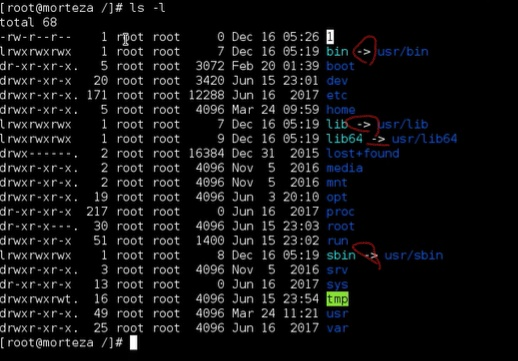
